Things to learn in this section:

✔️  Use TensorFlow 2.x.  
✔️  Build, compile and train machine learning (ML) models using TensorFlow.  
✔️  Preprocess data to get it ready for use in a model.  
✔️  Use models to predict results.  
✔️  Build sequential models with multiple layers.  
✔️  Build and train models for multi-class categorization.  
✔️  Plot loss and accuracy of a trained model.  
✔️  Identify strategies to prevent overfitting, including augmentation and dropou  
✔️  Ensure that inputs to a model are in the correct shape.  
✔️  Ensure that you can match test data to the input shape of a neural network.  
✔️  Ensure you can match output data of a neural network to specified input shape for test data.  
✔️  Use callbacks to trigger the end of training cycles.  
✔️  Use datasets from tf.data.datasets.  
✔️  Understand how to use convolutions to improve your neural network.  
✔️  Define Convolutional neural networks with Conv2D and pooling layers.  

In [1]:
# run only once
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [6]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [17]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()

- __Use callbacks to trigger the end of training cycles.__  

In [18]:
y_train = to_categorical(y_train)

In [19]:
x_train = x_train/255
x_train = x_train.reshape((60000, 28, 28,1))

In [33]:
ACCURACY_THRESHOLD = 0.99

# create a callback
class stopTraining(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>ACCURACY_THRESHOLD):
            print(str('\n'+str(ACCURACY_THRESHOLD)+' accuracy level reached.'))
            self.model.stop_training=True

cb_acc_level_reached = stopTraining()

- __Building A Sequential Model__
- __Understand how to use convolutions to improve your neural network__  
- __Build, compile and train machine learning (ML) models using TensorFlow__  

In [35]:
# build
model = Sequential([
    
    Conv2D(filters=16, kernel_size = (3,3), activation=tf.nn.relu, input_shape=(28, 28 ,1)),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    
    Flatten(input_shape=[28,28]),
    
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

# compile
model.compile(
    loss='categorical_crossentropy',                                # sparse_categorical_crossentropy can be used, without one-hot-encoding for y
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

# train
history = model.fit(
    x_train,
    y_train,
    epochs=10, verbose=1,
    callbacks= [cb_acc_level_reached]
         )

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2265 - accuracy: 0.9321
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0757 - accuracy: 0.9779
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0484 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0350 - accuracy: 0.9893
Epoch 5/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9920
0.99 accuracy level reached.
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0257 - accuracy: 0.9921


- __Use models to predict results__  

In [36]:
ds, info = tfds.load('mnist', split='test', shuffle_files=True, with_info=True)

In [37]:
images_test = []
labels_test = []
for example in tfds.as_numpy(ds):
    image, label = example["image"], example["label"]
    images_test.append(image)
    labels_test.append(label)

images_test = np.array(images_test)
images_test = images_test/255

In [38]:
predictions = model.predict(images_test)
predictions = np.argmax(predictions, axis=1)          # one-hot-encoding to integer

In [39]:
predictions

array([6, 2, 3, ..., 2, 6, 1])

In [40]:
np.sum(np.array(labels_test) == predictions)

9843

- __Plotting Accuracy__

In [45]:
acc = history.history['accuracy']

In [46]:
acc

[0.932116687297821,
 0.9778500199317932,
 0.9852833151817322,
 0.9893166422843933,
 0.9920666813850403]

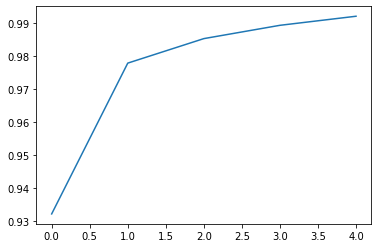

In [47]:
plt.plot(acc)